In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head(10)

,Length,Width,Thickness,Working Width,Epoch
0,14.418594,4.492233,6.228045,2.746836,4.573289
1,6.416955,10.661753,4.346087,3.949203,2.676545
2,6.583058,12.082281,4.472702,3.142853,8.083503
3,14.280348,5.111007,5.646974,3.025639,5.414505
4,15.121059,1.927749,2.046204,2.423817,7.614661
5,5.404853,4.228419,2.033189,1.528347,5.691051
6,15.568509,8.344746,9.092434,2.329226,5.109392
7,11.139750,4.461628,4.831434,2.404214,2.264130
8,6.960213,6.638441,2.116817,0.342207,4.502793
9,16.108227,1.897144,1.799735,2.363544,9.345614


In [4]:
data.shape

(500, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
Length           500 non-null float64
Width            500 non-null float64
Thickness        500 non-null float64
Working Width    500 non-null float64
Epoch            500 non-null float64
dtypes: float64(5)
memory usage: 19.6 KB


In [6]:
data.describe()

,Length,Width,Thickness,Working Width,Epoch
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,10.785831,5.905237,3.093546,2.666898,5.753872
std,3.960396,3.017368,2.120724,1.168797,2.411055
min,4.062280,1.765692,0.690370,0.116673,1.017801
25%,6.948882,3.724303,1.627517,2.008470,4.031310
50%,11.269112,5.464779,2.069157,2.465055,5.711660
75%,14.171209,8.320455,4.837683,3.804134,7.341509
max,20.474997,13.392292,9.272603,5.288019,13.983360


### Выполните кластеризацию иерархическим методом. 
### Рассмотрите различные расстояния между объектами и между кластерами.

###### Посмотрим на данные

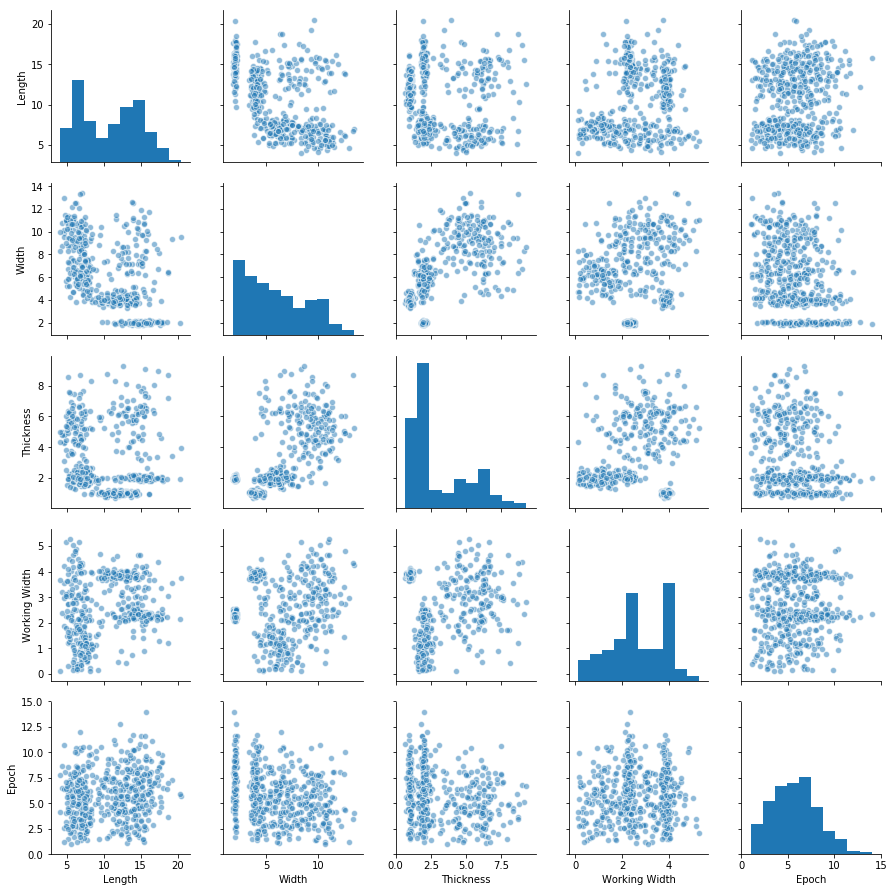

In [7]:
import seaborn as sns
sns.pairplot(data,plot_kws={'alpha':0.5})
plt.show()

###### Ярко выражены около 4-5 кластеров, построим дендрограмму для более точного определения

In [8]:
Z = linkage(data, method='complete')
def plot_elbow(Z, h=10, w=5):
    plt.figure(figsize=(h, w))
    plt.plot(np.array(range(1, np.shape(Z)[0]+1)), 
             Z[:,2][::-1], 
             marker='o')
    plt.xlabel("Number of clusters")
    plt.ylabel("Merge distance")
    plt.show()

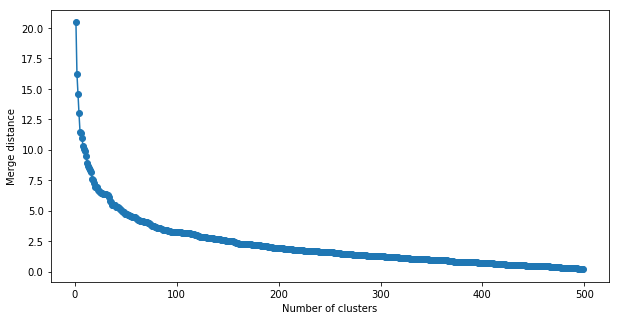

In [9]:
plot_elbow(Z)

###### Примерное разбиение кластеров до 20

In [10]:
from scipy.cluster.hierarchy import linkage, dendrogram

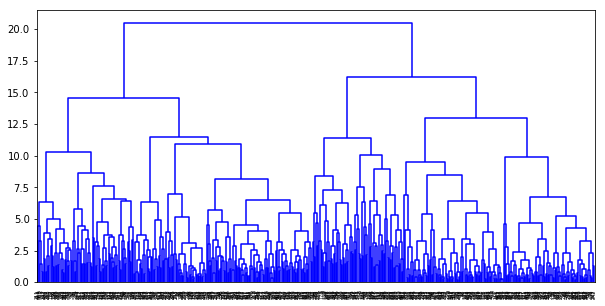

In [11]:
Z = linkage(data, method='complete')


plt.figure(figsize=(10, 5))
dendrogram(Z, color_threshold=0)
plt.show()

###### Обрежем дендрограмму на расстоянии 11.5 -> получим разбиение на пять кластеров

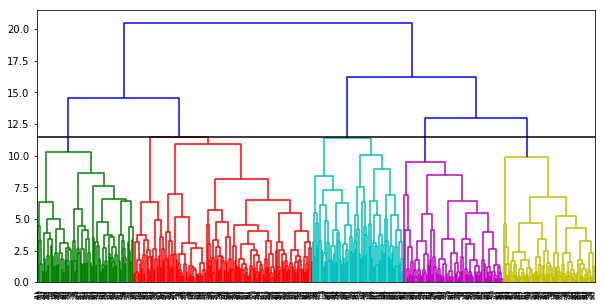

In [12]:
plt.figure(figsize=(10, 5))
dendrogram(Z, color_threshold=11.5)
plt.axhline(y=11.5, c='k')
plt.show()

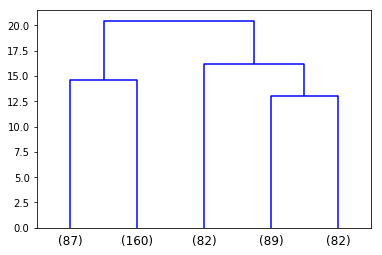

In [13]:
#plt.figure(figsize=(10, 5))
dendrogram(Z 
           ,p=5
           ,truncate_mode='lastp' 
           ,color_threshold=0
           #,orientation='left'
          )
#plt.axhline(y=0.2, c='k')
plt.show()

###### И на расстоянии 10.3 -> получим разбиение на 8 кластеров

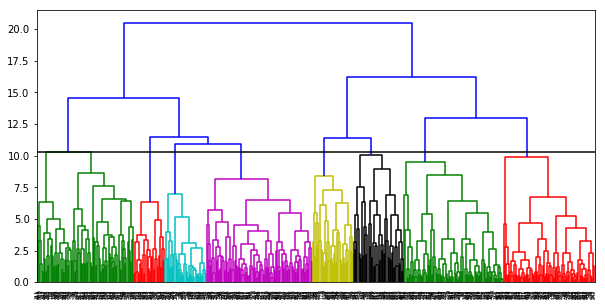

In [14]:
plt.figure(figsize=(10, 5))
dendrogram(Z, color_threshold=10.3)
plt.axhline(y=10.3, c='k')
plt.show()

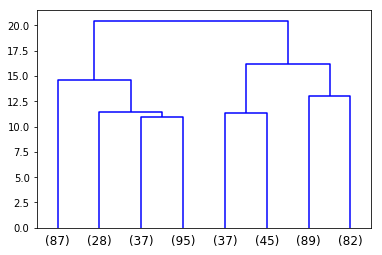

In [15]:
#plt.figure(figsize=(10, 5))
dendrogram(Z 
           ,p=8
           ,truncate_mode='lastp' 
           ,color_threshold=0
           #,orientation='left'
          )
#plt.axhline(y=0.2, c='k')
plt.show()

In [16]:
from scipy.cluster.hierarchy import fcluster

###### Посмотрим разбиение по числу кластеров

In [17]:
fcluster(Z, t = 5, criterion='maxclust')

array([3, 1, 1, 3, 4, 2, 3, 3, 2, 4, 3, 4, 4, 4, 4, 1, 3, 3, 5, 5, 2, 5, 2,
       1, 5, 4, 3, 2, 1, 2, 1, 2, 2, 5, 2, 2, 4, 4, 1, 1, 4, 4, 4, 1, 3, 5,
       2, 2, 2, 2, 1, 5, 3, 5, 2, 5, 1, 2, 1, 1, 3, 4, 3, 2, 3, 2, 2, 5, 4,
       5, 2, 3, 1, 1, 5, 1, 1, 2, 5, 3, 2, 2, 2, 4, 5, 1, 5, 2, 4, 3, 2, 1,
       1, 1, 2, 4, 2, 2, 3, 2, 2, 2, 5, 2, 2, 2, 2, 3, 3, 4, 5, 4, 2, 1, 2,
       3, 3, 1, 1, 1, 3, 2, 4, 2, 3, 1, 2, 2, 2, 1, 3, 2, 1, 2, 2, 2, 5, 2,
       1, 2, 2, 1, 1, 2, 5, 2, 5, 3, 3, 2, 3, 2, 1, 2, 5, 2, 2, 2, 3, 3, 2,
       2, 5, 5, 2, 5, 3, 3, 4, 3, 4, 5, 5, 4, 1, 5, 4, 3, 3, 2, 3, 4, 4, 3,
       4, 4, 3, 5, 4, 2, 2, 4, 1, 2, 4, 4, 5, 4, 1, 4, 3, 5, 2, 4, 2, 2, 2,
       4, 3, 2, 5, 1, 3, 1, 1, 2, 4, 1, 2, 3, 2, 4, 1, 4, 4, 5, 2, 4, 5, 1,
       3, 4, 2, 3, 1, 3, 3, 5, 2, 5, 2, 2, 5, 3, 2, 4, 2, 4, 5, 4, 4, 2, 5,
       1, 5, 2, 2, 2, 3, 4, 3, 2, 2, 1, 2, 1, 4, 2, 3, 5, 3, 1, 1, 5, 3, 5,
       1, 4, 2, 2, 2, 3, 4, 1, 1, 3, 5, 1, 2, 1, 1, 4, 4, 4, 5, 3, 2, 1, 5,
       4, 2,

###### По порогу

In [18]:
fcluster(Z, t = 11.5, criterion='distance')

array([3, 1, 1, 3, 4, 2, 3, 3, 2, 4, 3, 4, 4, 4, 4, 1, 3, 3, 5, 5, 2, 5, 2,
       1, 5, 4, 3, 2, 1, 2, 1, 2, 2, 5, 2, 2, 4, 4, 1, 1, 4, 4, 4, 1, 3, 5,
       2, 2, 2, 2, 1, 5, 3, 5, 2, 5, 1, 2, 1, 1, 3, 4, 3, 2, 3, 2, 2, 5, 4,
       5, 2, 3, 1, 1, 5, 1, 1, 2, 5, 3, 2, 2, 2, 4, 5, 1, 5, 2, 4, 3, 2, 1,
       1, 1, 2, 4, 2, 2, 3, 2, 2, 2, 5, 2, 2, 2, 2, 3, 3, 4, 5, 4, 2, 1, 2,
       3, 3, 1, 1, 1, 3, 2, 4, 2, 3, 1, 2, 2, 2, 1, 3, 2, 1, 2, 2, 2, 5, 2,
       1, 2, 2, 1, 1, 2, 5, 2, 5, 3, 3, 2, 3, 2, 1, 2, 5, 2, 2, 2, 3, 3, 2,
       2, 5, 5, 2, 5, 3, 3, 4, 3, 4, 5, 5, 4, 1, 5, 4, 3, 3, 2, 3, 4, 4, 3,
       4, 4, 3, 5, 4, 2, 2, 4, 1, 2, 4, 4, 5, 4, 1, 4, 3, 5, 2, 4, 2, 2, 2,
       4, 3, 2, 5, 1, 3, 1, 1, 2, 4, 1, 2, 3, 2, 4, 1, 4, 4, 5, 2, 4, 5, 1,
       3, 4, 2, 3, 1, 3, 3, 5, 2, 5, 2, 2, 5, 3, 2, 4, 2, 4, 5, 4, 4, 2, 5,
       1, 5, 2, 2, 2, 3, 4, 3, 2, 2, 1, 2, 1, 4, 2, 3, 5, 3, 1, 1, 5, 3, 5,
       1, 4, 2, 2, 2, 3, 4, 1, 1, 3, 5, 1, 2, 1, 1, 4, 4, 4, 5, 3, 2, 1, 5,
       4, 2,

##### Если принять число кластеров равным 8, а расстояние равным 11 получим неплохое разбиение

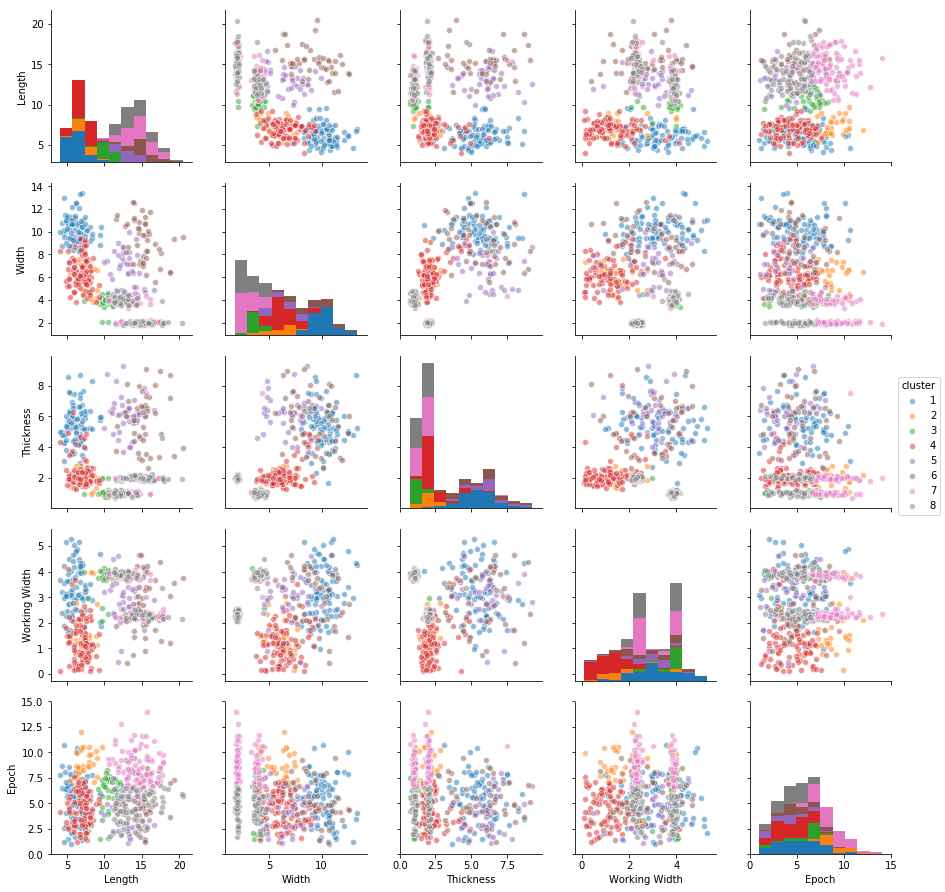

In [19]:
data['cluster'] = fcluster(Z, t = 10.3, criterion='distance')
sns.pairplot(data, hue='cluster', plot_kws={'alpha':0.5}, vars=['Length', 
                                                                'Width',
                                                                'Thickness',
                                                                'Working Width','Epoch'])
plt.show()

##### Но если взять расстояние 11.5, а число кластеров сократить до 5, ничего сильно не изменится и основные кластеры останутся прежними
##### Для более точного разбиения необходимо посмотреть другие расстояния и разбиения

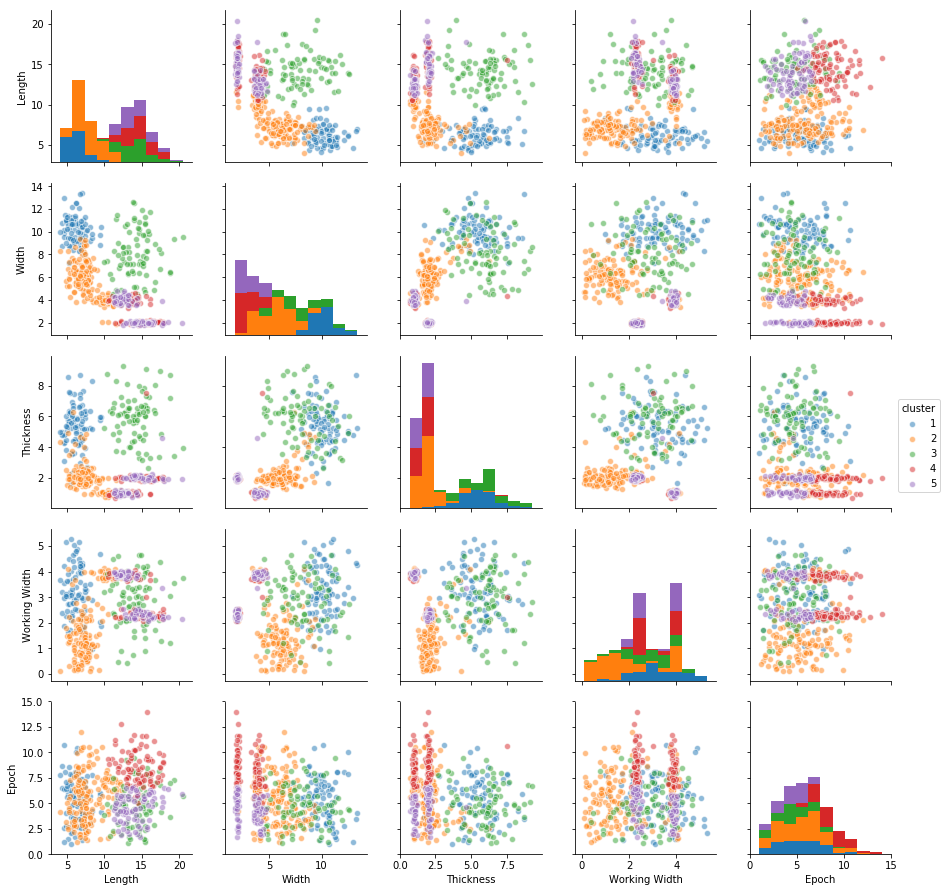

In [20]:
data['cluster'] = fcluster(Z, t = 11.5, criterion='distance')
sns.pairplot(data, hue='cluster', plot_kws={'alpha':0.5}, vars=['Length', 
                                                                'Width',
                                                                'Thickness',
                                                                'Working Width','Epoch'])
plt.show()

###### Рассмотрим другие расстояния между объектами

In [21]:
d = {'euclidean': pdist(data, 'euclidean'),
     'cityblock': pdist(data, 'cityblock'),
     'minkowski_6': pdist(data, 'minkowski', p=6),
     'cosine': pdist(data, 'cosine'),
     'chebyshev': pdist(data, 'chebyshev'),
     'canberra': pdist(data, 'canberra')}

In [22]:
D = pd.DataFrame(d)
D.shape

(124750, 6)

In [23]:
D_corr = D.corr().loc[['cityblock', 'euclidean', 'minkowski_6', 'chebyshev', 'canberra', 'cosine'],
                      ['cityblock', 'euclidean', 'minkowski_6', 'chebyshev', 'canberra', 'cosine']
                     ]
D_corr

,cityblock,euclidean,minkowski_6,chebyshev,canberra,cosine
cityblock,1.000000,0.970540,0.873633,0.838707,0.917159,0.853730
euclidean,0.970540,1.000000,0.960748,0.936368,0.842218,0.836413
minkowski_6,0.873633,0.960748,1.000000,0.995688,0.715727,0.742465
chebyshev,0.838707,0.936368,0.995688,1.000000,0.679099,0.705638
canberra,0.917159,0.842218,0.715727,0.679099,1.000000,0.789889
cosine,0.853730,0.836413,0.742465,0.705638,0.789889,1.000000


###### Рассмотрим кореляции

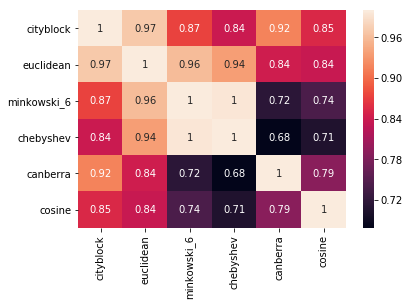

In [24]:
sns.heatmap(D_corr, annot=True)
plt.show()

###### Сильно отличаются косинусное расстояние и canberra
###### Ради более точной оценки кластеризации рассмотрим также косинусное расстояние

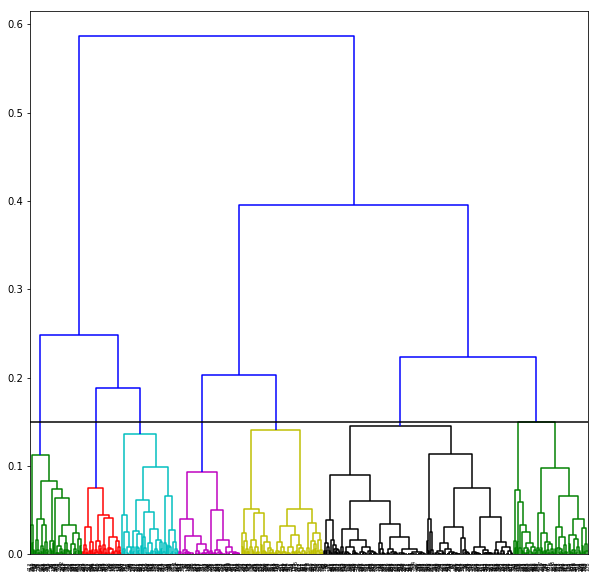

In [25]:
Z = linkage(data, method='complete', metric='cosine')

plt.figure(figsize=(10, 10))
dendrogram(Z, color_threshold=0.15)
plt.axhline(y=0.15, c='k')
plt.show()

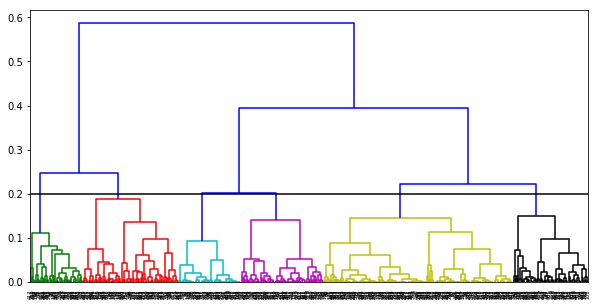

In [26]:
plt.figure(figsize=(10, 5))
dendrogram(Z, color_threshold=0.2)
plt.axhline(y=0.2, c='k')
plt.show()

###### Обрежем дендрограмму

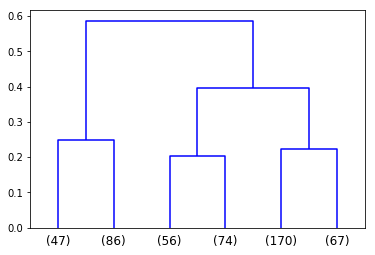

In [27]:
#plt.figure(figsize=(10, 5))
dendrogram(Z 
           ,p=6
           ,truncate_mode='lastp' 
           ,color_threshold=0
           #,orientation='left'
          )
#plt.axhline(y=0.2, c='k')
plt.show()

###### Нет сильно больших или сильно маленьких кластеров. Удачно

###### Взяв расстояние между элементами кластеров в 0.2 получим неплохое разбиение, по крайней мере на дендрограмме

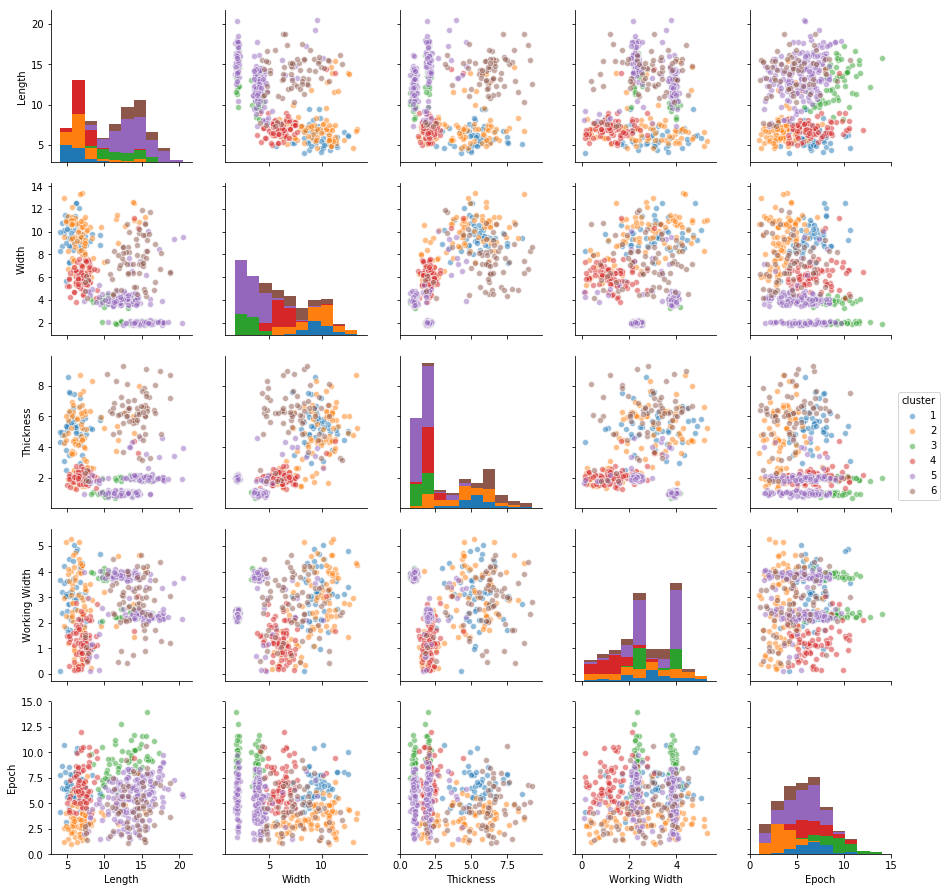

In [28]:
data['cluster'] = fcluster(Z, t = 0.2, criterion='distance')
sns.pairplot(data, hue='cluster', plot_kws={'alpha':0.5}, vars=['Length', 
                                                                'Width',
                                                                'Thickness',
                                                                'Working Width','Epoch'])
plt.show()

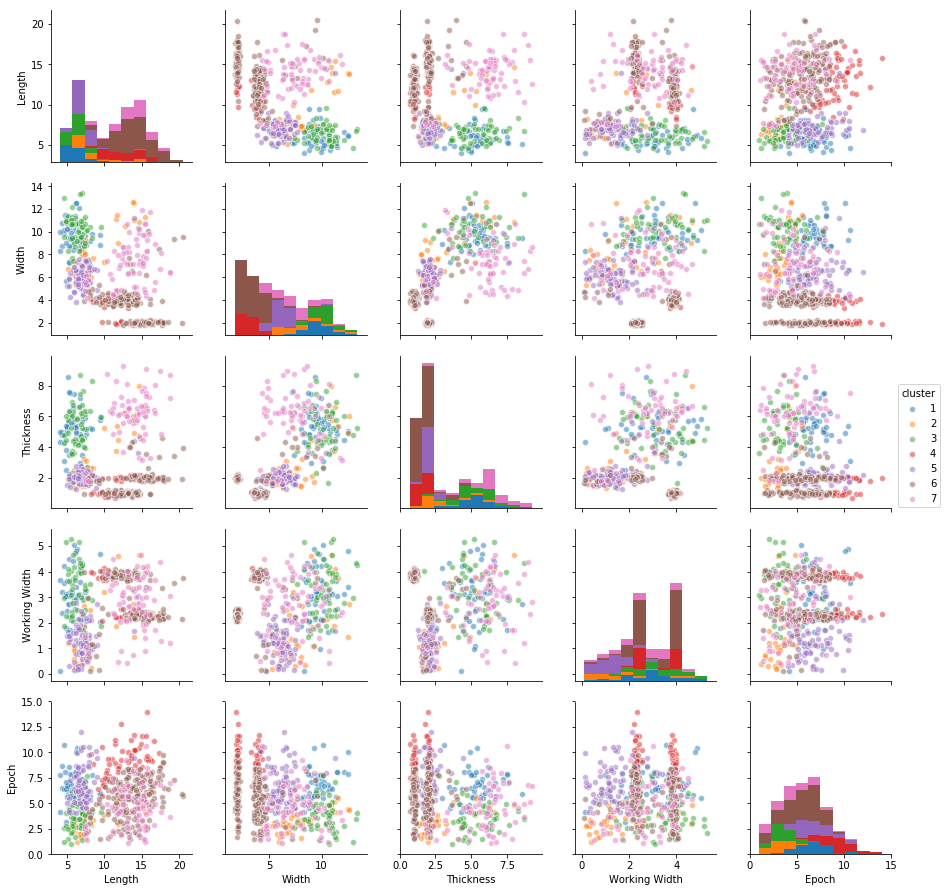

In [29]:
data['cluster'] = fcluster(Z, t = 0.15, criterion='distance')
sns.pairplot(data, hue='cluster', plot_kws={'alpha':0.5}, vars=['Length', 
                                                                'Width',
                                                                'Thickness',
                                                                'Working Width','Epoch'])
plt.show()

###### Хорошо выражены 6 кластеров, при косинусном расстоянии между кластерами и 0.2 расстоянии между объектами

###### Посмотрим, что будет если считать расстояние не по формуле дальнего соседа, а по медиане

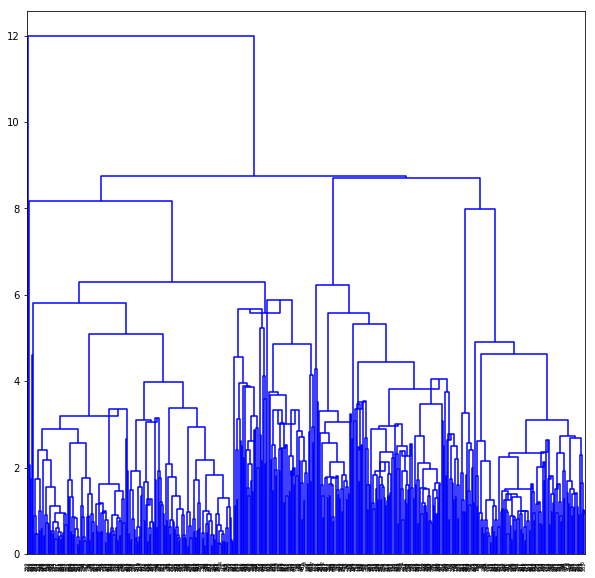

In [31]:
Z = linkage(data, method='median', metric='euclidean')

plt.figure(figsize=(10, 10))
dendrogram(Z, color_threshold=0.15)
#plt.axhline(y=0.15, c='k')
plt.show()

###### Сразу становится видно, что по дендрограмме, в таком случае, мало что видно
###### Попробуем посмотреть расстояние по методу ближайшего соседа, для косинусного расстояния

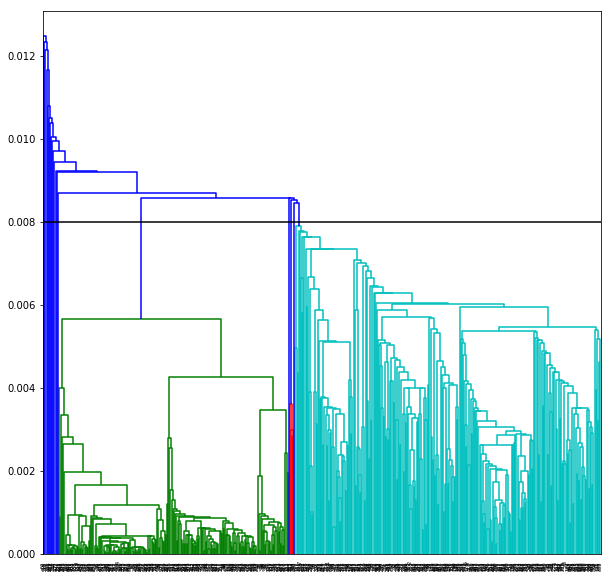

In [32]:
Z = linkage(data, method='single', metric='cosine')

plt.figure(figsize=(10, 10))
dendrogram(Z, color_threshold=0.008)
plt.axhline(y=0.008, c='k')
plt.show()

###### В данном случае тоже мало что можно сказать по дендрограмме

###### Однако, давайте сравним разбиения для косинусного расстояния более наглядно

In [33]:
#Z = linkage(data, method='complete', metric='cosine')

In [35]:
hc_complete = fcluster(linkage(data, method='complete'),
                       t=6,
                       criterion='maxclust'
                      )
hc_median = fcluster(linkage(data, method='median'),
                     t=6,
                     criterion='maxclust'
                    )

pd.crosstab(hc_complete, hc_median, rownames=['hc_complete'], colnames=['hc_median'])

hc_median,1,2,3,4,5,6
hc_complete,,,,,,
1,0,0,94,0,0,0
2,0,0,28,7,82,0
3,3,73,8,0,0,0
4,0,33,0,0,0,1
5,0,76,0,6,17,0
6,0,72,0,0,0,0


###### Можно сделать вывод, что разбиения не совпадают

###### Посмотрим по эвклидову расстоянию

In [36]:
#Z = linkage(data, method='complete', metric='euclidean')

In [37]:
hc_complete = fcluster(linkage(data, method='complete'),
                       t=5,
                       criterion='maxclust'
                      )
hc_median = fcluster(linkage(data, method='median'),
                     t=5,
                     criterion='maxclust'
                    )

pd.crosstab(hc_complete, hc_median, rownames=['hc_complete'], colnames=['hc_median'],normalize=True)

hc_median,1,2,3,4,5
hc_complete,,,,,
1,0.000,0.000,0.188,0.000,0.000
2,0.000,0.000,0.056,0.178,0.000
3,0.006,0.146,0.016,0.000,0.000
4,0.000,0.066,0.000,0.000,0.002
5,0.000,0.296,0.000,0.046,0.000


###### А теперь для косинусного

In [38]:
hc_complete = fcluster(linkage(data, method='complete'),
                       t=6,
                       criterion='maxclust'
                      )
hc_median = fcluster(linkage(data, method='median'),
                     t=6,
                     criterion='maxclust'
                    )

pd.crosstab(hc_complete, hc_median, rownames=['hc_complete'], colnames=['hc_median'],normalize=True)

hc_median,1,2,3,4,5,6
hc_complete,,,,,,
1,0.000,0.000,0.188,0.000,0.000,0.000
2,0.000,0.000,0.056,0.014,0.164,0.000
3,0.006,0.146,0.016,0.000,0.000,0.000
4,0.000,0.066,0.000,0.000,0.000,0.002
5,0.000,0.152,0.000,0.012,0.034,0.000
6,0.000,0.144,0.000,0.000,0.000,0.000


###### Тоже видно, что не слишком сильно совпадают

###### По итогу стоит отметить, что наилучшая кластеризация, на мой взгляд, получилась при косинусном расстоянии, при разбиении на 6 кластеров по методу дальнего соседа

###### Необходимо проверить данное предположение на метриках, во-первых, Силуэт

In [39]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score
ind =-1
Max=-1
for i in range(4,20):
    Z = linkage(data, method='complete', metric='cosine')
    f_data = fcluster(Z, t = i, criterion='maxclust')
    ME = silhouette_score(data,f_data)
    #print(ME)
    #print(i)
    if ME>Max:
        Max=ME
        ind =i
        
print(Max)
print(ind)

0.243939717958
7


In [40]:
ind =-1
Max=-1
for i in range(5,20):
    Z = linkage(data, method='complete', metric='euclidean')
    f_data = fcluster(Z, t = i, criterion='maxclust')
    ME = silhouette_score(data,f_data)
    #print(ME)
    #print(i)
    if ME>Max:
        Max=ME
        ind =i
        
print(Max)
print(ind)

0.334110808982
6


In [41]:
ind =-1
Max=-1
for i in range(5,20):
    Z = linkage(data, method='complete', metric='canberra')
    f_data = fcluster(Z, t = i, criterion='maxclust')
    ME = silhouette_score(data,f_data)
    #print(ME)
    #print(i)
    if ME>Max:
        Max=ME
        ind =i
        
print(Max)
print(ind)

0.336917298255
5


In [42]:
ind =-1
Max=-1
for i in range(5,20):
    Z = linkage(data, method='median', metric='euclidean')
    f_data = fcluster(Z, t = i, criterion='maxclust')
    ME = silhouette_score(data,f_data)
    #print(ME)
    #print(i)
    if ME>Max:
        Max=ME
        ind =i
        
print(Max)
print(ind)

0.245314644493
7


In [43]:
ind =-1
Max=-1
for i in range(5,20):
    Z = linkage(data, method='single', metric='canberra')
    f_data = fcluster(Z, t = i, criterion='maxclust')
    ME = silhouette_score(data,f_data)
    #print(ME)
    #print(i)
    if ME>Max:
        Max=ME
        ind =i
        
print(Max)
print(ind)

0.127129681953
19


In [44]:
ind =-1
Max=-1
for i in range(5,20):
    Z = linkage(data, method='single', metric='euclidean')
    f_data = fcluster(Z, t = i, criterion='maxclust')
    ME = silhouette_score(data,f_data)
    #print(ME)
    #print(i)
    if ME>Max:
        Max=ME
        ind =i
        
print(Max)
print(ind)

0.105401273781
12


###### Теперь Calinski-Harabaz

In [45]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score
ind =-1
Max=-1
for i in range(4,20):
    Z = linkage(data, method='complete', metric='cosine')
    f_data = fcluster(Z, t = i, criterion='maxclust')
    ME = calinski_harabaz_score(data,f_data)
    #print(ME)
    #print(i)
    if ME>Max:
        Max=ME
        ind =i
        
print(Max)
print(ind)

164.388014169
5


In [46]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score
ind =-1
Max=-1
for i in range(4,20):
    Z = linkage(data, method='complete', metric='euclidean')
    f_data = fcluster(Z, t = i, criterion='maxclust')
    ME = calinski_harabaz_score(data,f_data)
    #print(ME)
    #print(i)
    if ME>Max:
        Max=ME
        ind =i
        
print(Max)
print(ind)

325.362702962
4


In [47]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score
ind =-1
Max=-1
for i in range(4,20):
    Z = linkage(data, method='complete', metric='canberra')
    f_data = fcluster(Z, t = i, criterion='maxclust')
    ME = calinski_harabaz_score(data,f_data)
    #print(ME)
    #print(i)
    if ME>Max:
        Max=ME
        ind =i
        
print(Max)
print(ind)

314.858796994
4


###### Судя по метрикам, лучшая кластеризация добивается при делении на 4,5 или 6. Но 4 слишком мало, судя по данным